# Basic plotting in Python

This section provides a basic tutorial for plotting in Python. The [`matplotlib`](https://matplotlib.org/) is the main package used in python for plotting. This section describes following type of plots:

1. Simple plots
2. Subplots
3. Scatter plots
4. Contour plots

Following block of code imports required packages for this section:

In [26]:
import numpy as np
import matplotlib.pyplot as plt

The next block of code creates simple data which can be used for plotting:

In [2]:
# Creating data
x = np.linspace(0, 2*np.pi, 100)
f = np.sin(x)
g = np.cos(x)

## Simple plot

The [`subplots`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function from matplotlib is one of the simple ways to create a plot. This function doesn't have any mandatory arguments and returns two items: a `figure` object and `axes` object. The `figure` object controls the entire canvas on which figure is created while `axes` object defines individual plots. The `figure` object can contain multiple `axes` objects, especially when working with multiple subplots.

The [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) function from `axes` object can be used to create a simple line plot. The first argument of `plot` function is `x` data and second argument is `y` data. The third argument is used to define line color and style. The `plot` function can be called in different ways and also accepts a lot of other arguments, please refer documentation for more details.

Following code plots f and g with respect to x. Read the comments along the code for more information.

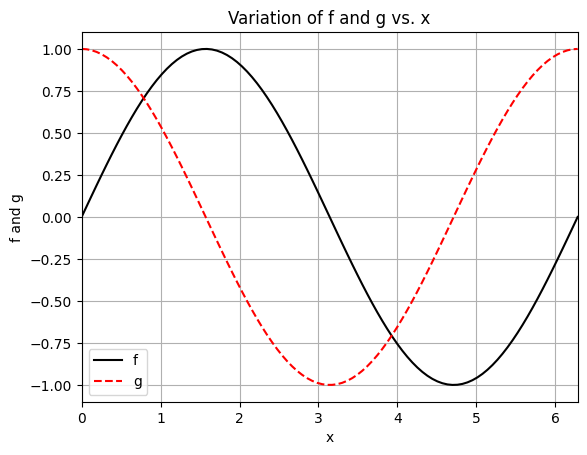

In [3]:
fig, ax = plt.subplots() # create the figure and axes object
ax.plot(x, f, "k-", label="f") # Plotting f vs x
ax.plot(x, g, "r--", label="g") # Plotting g vs x
ax.set_xlabel("x") # Adding x axis name
ax.set_ylabel("f and g") # Adding y axis name
ax.set_title("Variation of f and g vs. x")
ax.set_xlim(left=0.0, right=2*np.pi) # Setting limits for x axis
ax.legend() # Setting legend
ax.grid() # Adding grid lines

## Subplots

This subsection will discuss how to create multiple plots within same figure in matplotlib. A simple way to create multiple subplots is to define grid structure with desired number of rows and columns, each grid cell will contain a separate plot. While calling `subplots` function, the number of rows and columns can be provided as first and second argument, respectively. The default value for both arguments is 1. The `axes` object returned by the `subplots` function is a numpy array, if number of rows or columns is more than one. Below code creates two subplots, one for f and other for g.

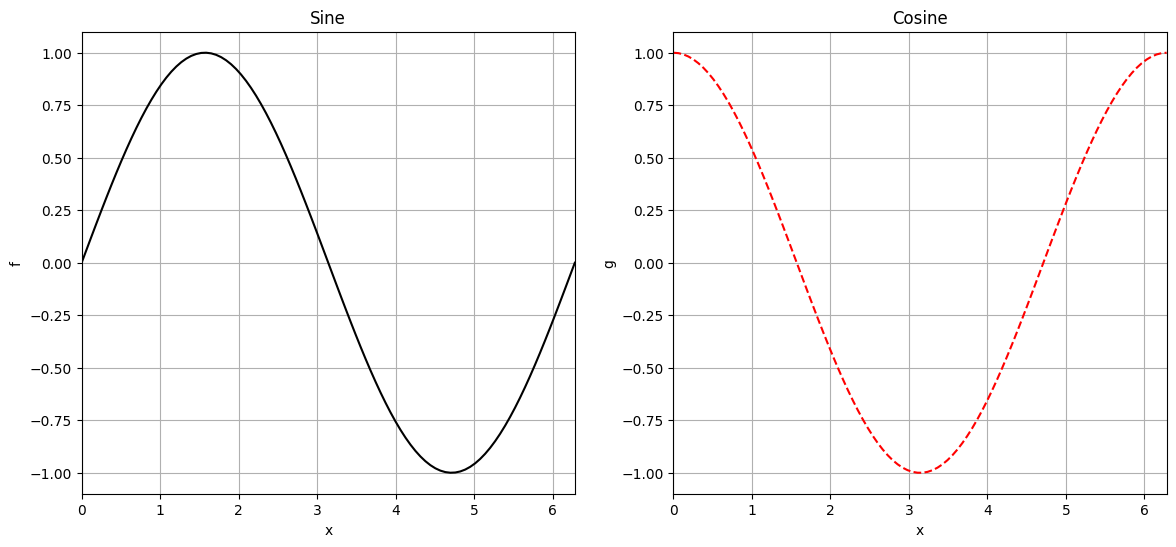

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(14,6)) # Creating a grid for subplots with 1 row and 2 columns

# First subplot
ax[0].plot(x, f, "k-")
ax[0].set_xlabel("x")
ax[0].set_ylabel("f")
ax[0].set_title("Sine")
ax[0].set_xlim(left=0.0, right=2*np.pi)
ax[0].grid()

# Second subplot
ax[1].plot(x, g, "r--")
ax[1].set_xlabel("x")
ax[1].set_ylabel("g")
ax[1].set_title("Cosine")
ax[1].set_xlim(left=0.0, right=2*np.pi)
ax[1].grid()

## Scatter plot

Matplotlib can be used to create scatter plots as well. The [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function from `axes` object is used for creating scatter plots. The first argument is `x` data while second argument is `y` data. The `marker` argument defines the type of marker (such as square, circle, etc) used in the plot. The `s` argument controls the size of marker while `c` defines color of the marker. There are many other arguments which can be passed to `scatter` function, refer documentation for more details. 

Below block of code creates a simple data which is then used for creating a scatter plot.

(-2.0, 2.0)

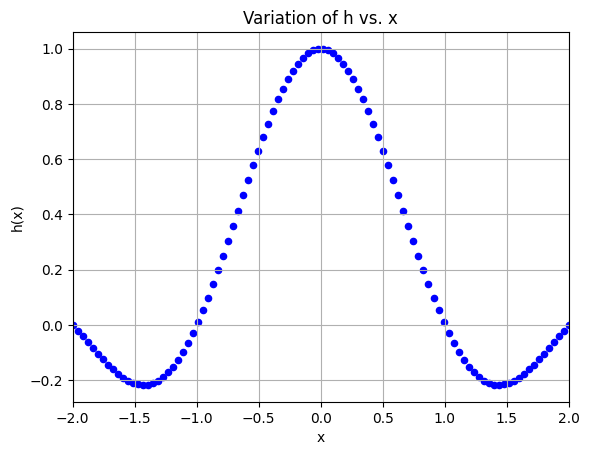

In [29]:
# Creating data
x = np.linspace(-2,2,100)
h = np.sinc(x)

# Scatter plot
fig, ax = plt.subplots()
ax.scatter(x, h, marker="o", s=20, c="b")
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("h(x)")
ax.set_title("Variation of h vs. x")
ax.set_xlim(left=-2.0, right=2.0)

## Contour plot

Matplotlib can be used for creating contour plot also. Typically, there are two types of contour plots: filled contour plot and line contour plot.

The [`contourf`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) function from `axes` object is used to create a filled contour plot. The first three inputs to `contourf` function are `x`, `y`, and `z` data. Note that all the three inputs are usually 2D numpy array and should be of the same size. The `contourf` function also has an optional `levels` argument which decides the number and location of contour regions. If `levels` argument is not provided, then appropriate number of levels is determined automatically.

Below code defines a simple 2D function and generates plotting data.

In [8]:
func_2d = lambda x,y: (1 - x)**2 + (1 - y)**2 + (2*y - x**2)**2 / 2

# Creating data
x = np.linspace(-2,2,20)
y = np.linspace(-1,3,20)

# Creating a mesh at which values will be evaluated and plotted
X, Y = np.meshgrid(x, y)

# Evaluating the function values at meshpoints
Z = func_2d(X,Y)

Below block of code creates a filled contour plot using the data generated in previous block

Text(0.5, 1.0, 'Simple contour plot')

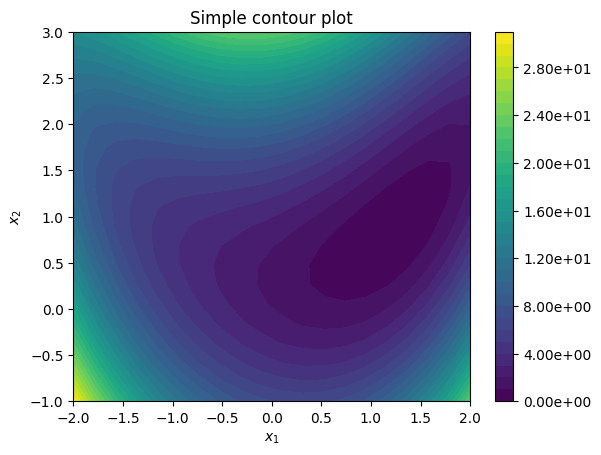

In [10]:
# Plotting the contours
fig, ax = plt.subplots()
cp = ax.contourf(X, Y, Z, levels=30)
fig.colorbar(cp, format='%.2e', orientation='vertical')
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title("Simple contour plot")

In the above plot, there is an imbalance in how data values are linked to color. Due to this, most of the plot is dominated by lower values (and darker color). The large variation in data values is the reason for this imbalance. Thus, contour levels should to be created on log scale and then link them to color scale.

> **_NOTE:_** The logscale is required only when the range of data values is large and logscale will only work if all the data values are positive.

Below block of code creates 30 contour levels on log scale and also create a color scale.

Text(0.5, 1.0, 'Bean Function')

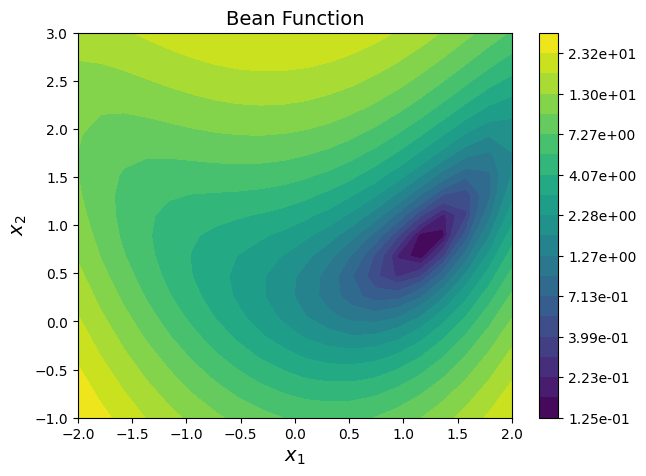

In [27]:
# Contour levels are evaluated in logscale since the difference
# between minimum and maximum value of function is large.
noOfLevels = 20
levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), noOfLevels, base = 10)

import matplotlib.colors as colors

# Defining normalization which is used to normalize the function values
# before mapping with color. We need to use this since contour levels are
# defined on log scale
norm = colors.LogNorm(vmin=Z.min(), vmax=Z.max())

# Plotting the contours
fig, ax = plt.subplots(figsize=(7,5))
CS = ax.contourf(X, Y, Z, levels=levels, norm=norm)
fig.colorbar(CS, format='%.2e', orientation='vertical')
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_title("Bean Function", fontsize=14)

### Contour lines

Text(0.5, 1.0, 'Bean Function')

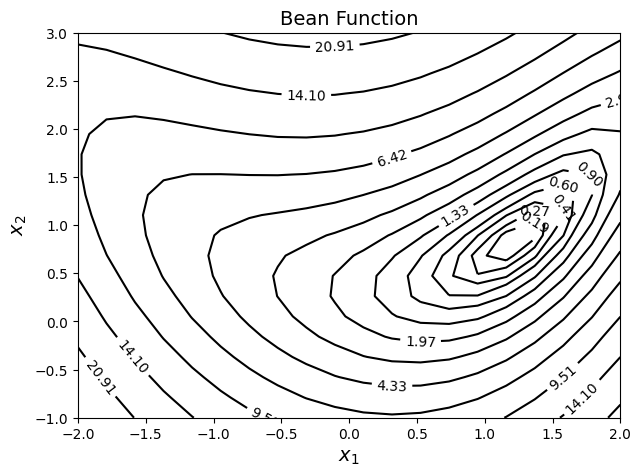

In [25]:
# Contour levels are evaluated in logscale since the difference
# between minimum and maximum value of function is large.
noOfLevels = 15
levels = np.logspace(np.log10(Z.min()), np.log10(Z.max()), noOfLevels, base = 10)

# Defining normalization which is used to normalize the function values
# before mapping with color. We need to use this since levels for contour
# is defined on log scale
norm = colors.LogNorm(vmin = Z.min(), vmax = Z.max())

# Plotting the contours
fig, ax = plt.subplots(figsize=(7,5))
cp = ax.contour(X, Y, Z, levels=levels, norm=norm, colors="k")
ax.clabel(cp, inline=1)
ax.set_xlabel("$x_1$", fontsize=14)
ax.set_ylabel("$x_2$", fontsize=14)
ax.set_title("Bean Function", fontsize=14)